**Step 1: Import Necessary LibrariespythonCopy code**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster


**Step 2: Load the Dataset**

In [3]:

data = pd.read_excel("/content/SOIL.xls")

print(data.head())

    pH    OM  Total N2     K    Ca    Mg     P     S    Cu    Zn    Fe     Mn  \
0  5.9  1.98      0.09  0.60  34.4  5.01  21.7  13.5  6.58  2.96  89.5  10.80   
1  6.1  1.19      0.05  0.26  28.4  2.78  22.9  14.2  4.52  1.64  67.7   6.70   
2  6.5  1.72      0.06  0.15  34.9  3.67  18.5   8.9  3.68  1.18  95.6   4.71   
3  6.4  2.12      0.10  0.28  28.8  2.98  48.3  34.7  3.56  0.93  93.7   4.43   
4  6.8  1.83      0.07  0.17  21.8  3.54  55.7  29.8  3.93  0.71  81.0   2.39   

         Lat       Long  
0  23.882586  89.104881  
1  23.882157  89.105809  
2  23.882157  89.106844  
3  23.881979  89.107844  
4  23.881586  89.108858  


**Step 3: Data Analysis**

In [4]:
# Check basic statistics of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

              pH         OM   Total N2          K         Ca         Mg  \
count  20.000000  20.000000  20.000000  20.000000  20.000000  20.000000   
mean    6.805000   1.850000   0.077000   0.355500  27.705000   3.993000   
std     0.344085   0.227365   0.016575   0.166622   5.494349   1.275296   
min     5.900000   1.190000   0.050000   0.150000  17.000000   1.410000   
25%     6.775000   1.752500   0.060000   0.230000  25.375000   3.467500   
50%     6.900000   1.840000   0.075000   0.350000  26.550000   3.945000   
75%     7.000000   2.005000   0.092500   0.440000  33.300000   4.657500   
max     7.300000   2.180000   0.100000   0.800000  36.500000   6.600000   

               P          S         Cu         Zn          Fe         Mn  \
count  20.000000  20.000000  20.000000  20.000000   20.000000  20.000000   
mean   34.985000  20.770000   5.792000   1.918500   76.555000   8.381500   
std    12.716019   8.029098   3.079052   1.997222   27.442773   5.602067   
min    18.500000   8

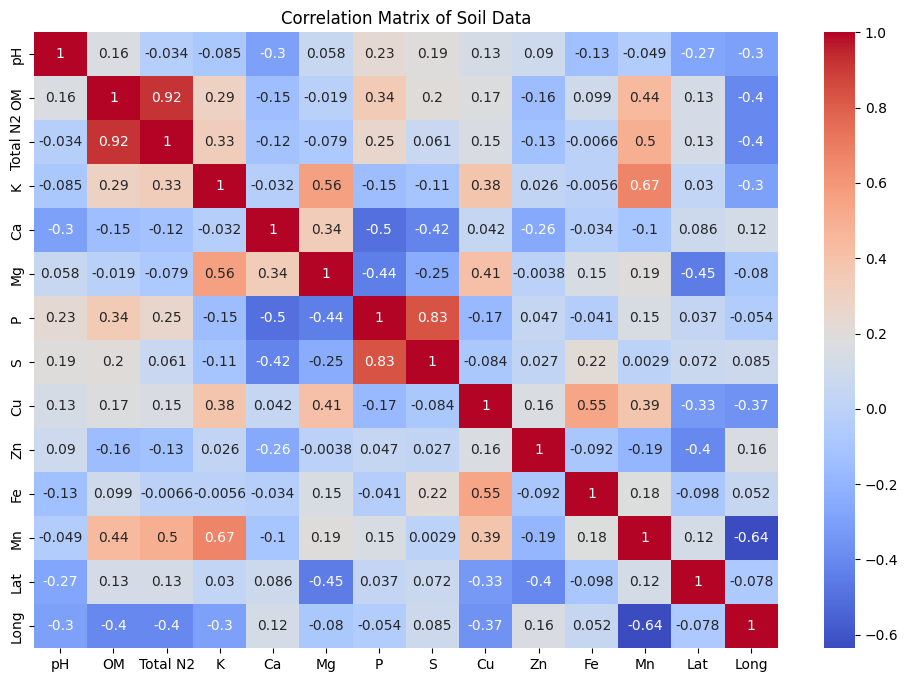

In [5]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Soil Data")
plt.show()

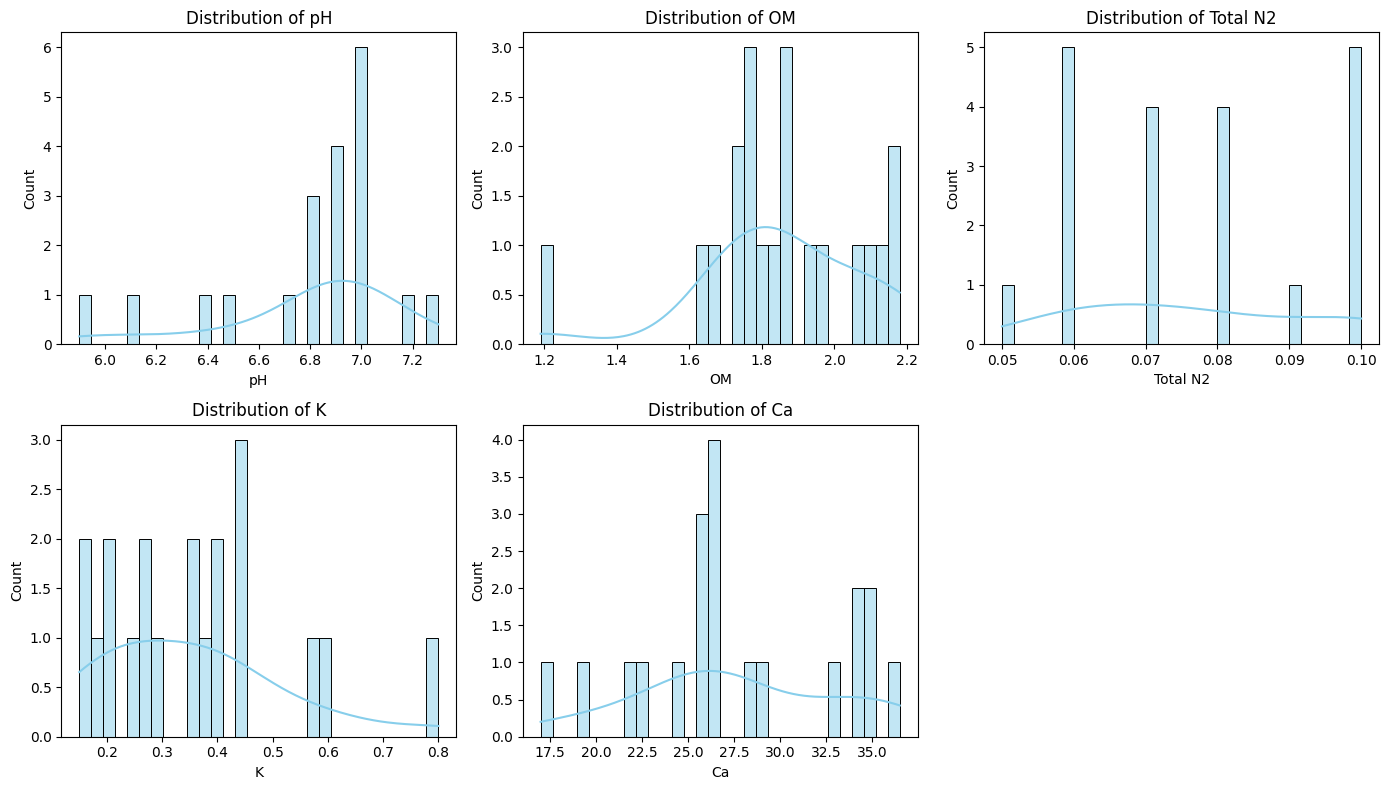

In [7]:
# Plot distributions of selected features
selected_features = ['pH', 'OM', 'Total N2', 'K', 'Ca']
plt.figure(figsize=(14, 8))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde = True, color='skyblue', bins=30)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

**Step 4: Map Visualization Using folium**

In [8]:
# Define a central point for the map (average of Lat and Long)
map_center = [data['Lat'].mean(), data['Long'].mean()]

# Create a folium map
soil_map = folium.Map(location=map_center, zoom_start=6)

# Add points to the map
for i, row in data.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius=5,
        popup=folium.Popup(f"pH: {row['pH']}, OM: {row['OM']}, Total N2: {row['Total N2']}", max_width=200),
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(soil_map)

# Save the map to an HTML file
soil_map.save("soil_map.html")

In [9]:
# Create a marker cluster
marker_cluster = MarkerCluster().add_to(soil_map)

# Add points to the cluster
for i, row in data.iterrows():
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=f"pH: {row['pH']}, OM: {row['OM']}, Total N2: {row['Total N2']}"
    ).add_to(marker_cluster)

# Save the updated map
soil_map.save("soil_map_with_clusters.html")

In [10]:
soil_map

**Step 5: Analyze Soil Quality Based on Location**

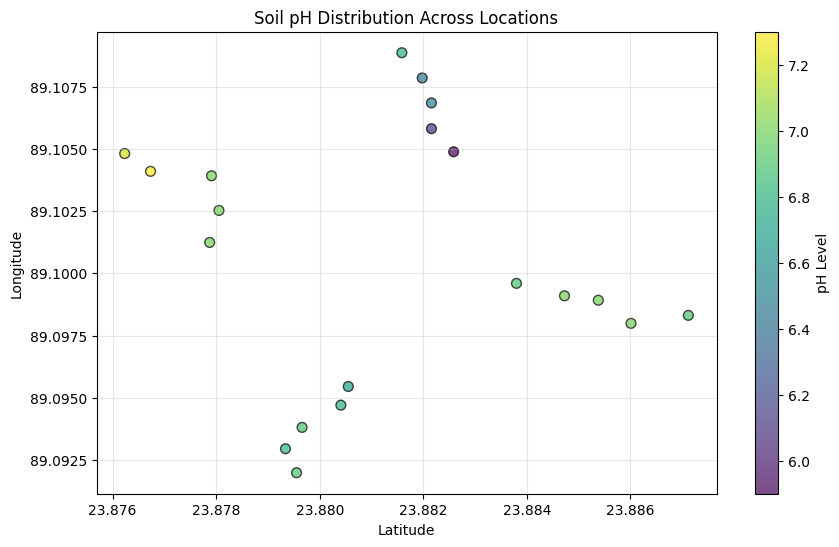

In [11]:
# Scatter plot colored by pH
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Lat'], data['Long'], c=data['pH'], cmap='viridis', s=50, edgecolor='k', alpha=0.7)
plt.colorbar(scatter, label='pH Level')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Soil pH Distribution Across Locations')
plt.grid(alpha=0.3)
plt.show()